# Linear response

Here we calculate the linear response of a strongly-driven Duffing resonator as presented in https://doi.org/10.1103/PhysRevX.10.021066.

We use the Jacobian of the harmonic equations as explained here: https://nonlinearoscillations.github.io/HarmonicBalance.jl/stable/examples/linear_response/

In [ ]:
using HarmonicBalance
@variables α, ωF, ω0, F, t, q(t), γ, Γ; # declare constant variables and a function q(t)

In [2]:
# define ODE
diff_eq = DifferentialEquation(d(q,t,2) + 2*Γ*d(q,t) + ω0^2*q + γ*q^3 ~ F*cos(ωF*t), q)

# specify the ansatz q = u(T) cos(ωF*t) + v(T) sin(ωF*t)
add_harmonic!(diff_eq, q, ωF) 

# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 2 harmonic equations
Variables: u1(T), v1(T)
Parameters: γ, ωF, ω0, Γ, F

Harmonic ansatz: 
q(t) = u1*cos(ωFt) + v1*sin(ωFt)

Harmonic equations:

(ω0^2)*u1(T) + (3//4)*γ*(u1(T)^3) + (2//1)*Γ*Differential(T)(u1(T)) + (2//1)*ωF*Differential(T)(v1(T)) + (2//1)*Γ*ωF*v1(T) + (3//4)*γ*(v1(T)^2)*u1(T) - (ωF^2)*u1(T) ~ F

(ω0^2)*v1(T) + (3//4)*γ*(v1(T)^3) + (2//1)*Γ*Differential(T)(v1(T)) + (3//4)*γ*(u1(T)^2)*v1(T) - (ωF^2)*v1(T) - (2//1)*ωF*Differential(T)(u1(T)) - (2//1)*Γ*ωF*u1(T) ~ 0


## response vs drive frequency (Fig. 1 (b))

We use nanometers to avoid numerical inaccuracy errors stemming from multiplying numbers with different orders of magnitude.

Tracking 9 paths... 100%|███████████████████████████████| Time: 0:00:11
  # paths tracked:                  9
  # non-singular solutions (real):  3 (1)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         3 (1)


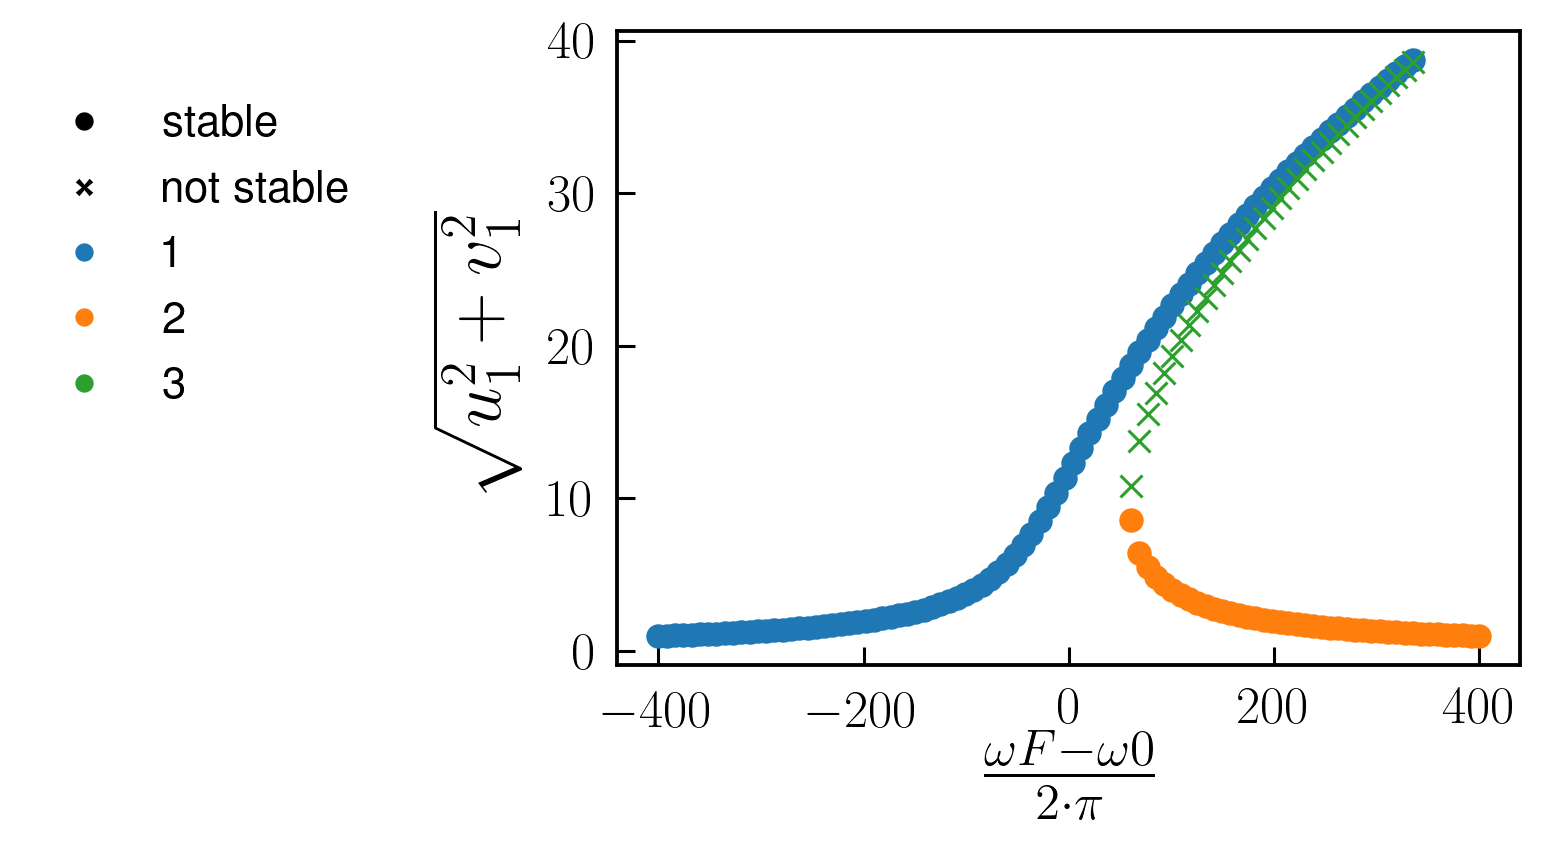

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/hrochan/.julia/packages/PyCall/L0fLP/src/numpy.jl:67
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [3]:
fixed = (Γ => π*20, ω0 => 2π*6.529E6, γ=>1.54E8, F => 2E11) # fixed parameters
swept = ωF => 2π *(6.529E6 .+ LinRange(-400, 400, 100) )    # range of ωF
solutions = get_steady_states(harmonic_eq, swept, fixed)

plot_1D_solutions(solutions, x="(ωF- ω0)/2π", y="sqrt(u1^2 + v1^2)");

## response vs drive amplitude on resonance

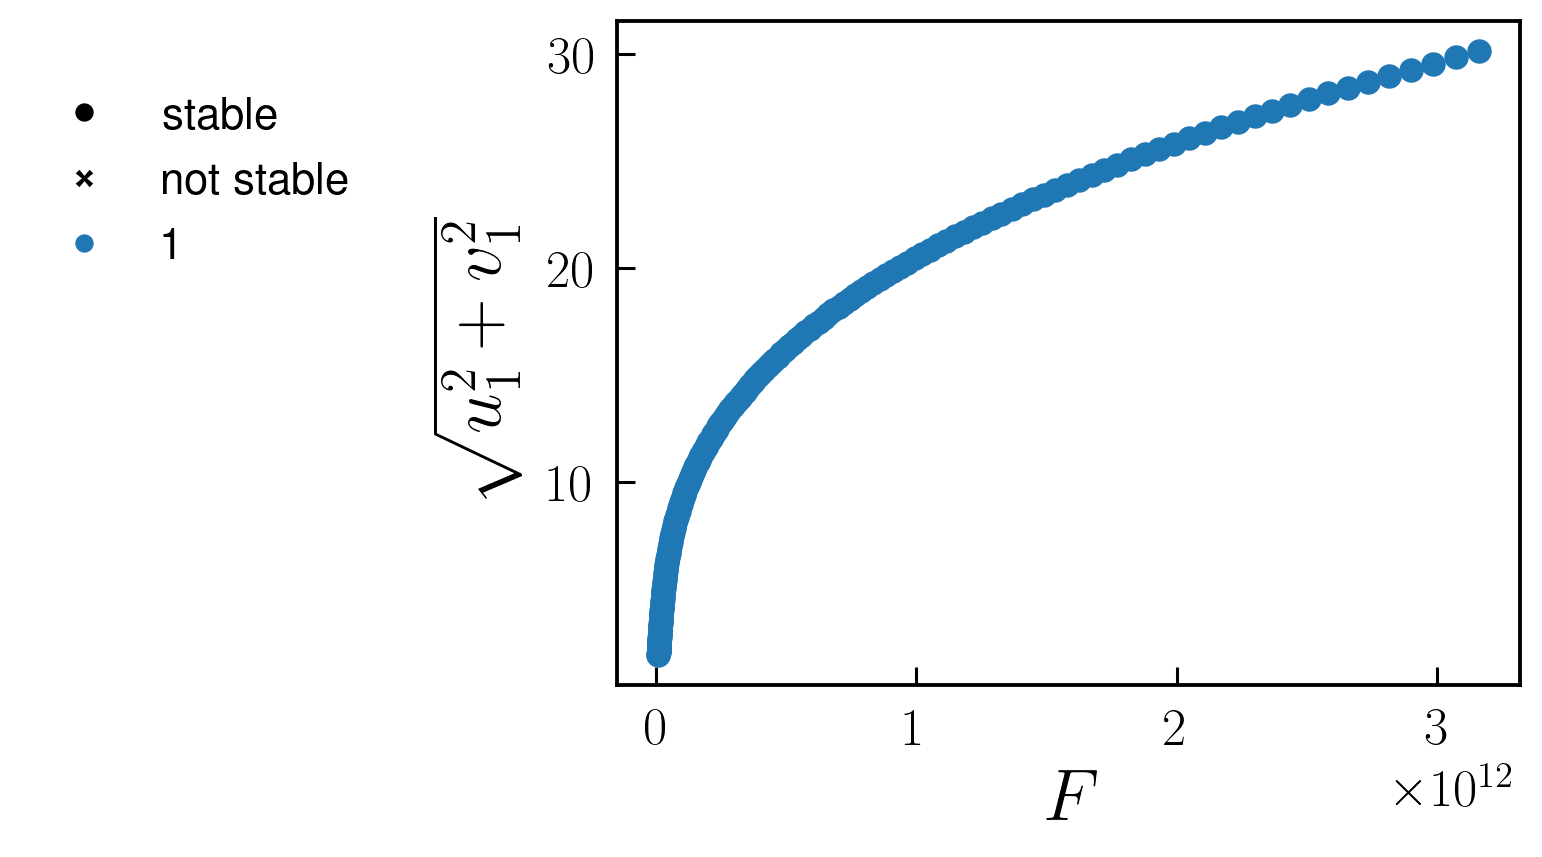

In [4]:
fixed = (Γ => π*20, ω0 => 2π*6.529E6, γ=>1.54E8, ωF => 2π*6.529E6) # fixed parameters
swept = F => 10 .^ LinRange(10, 12.5, 200)           # range of F
solutions = get_steady_states(harmonic_eq, swept, fixed)

plot_1D_solutions(solutions, x="F", y="sqrt(u1^2 + v1^2)");

## linear response to white noise vs drive amplitude (Fig. 2 (a))
a single stable branch was found - let's obtain its linear response via the Jacobian

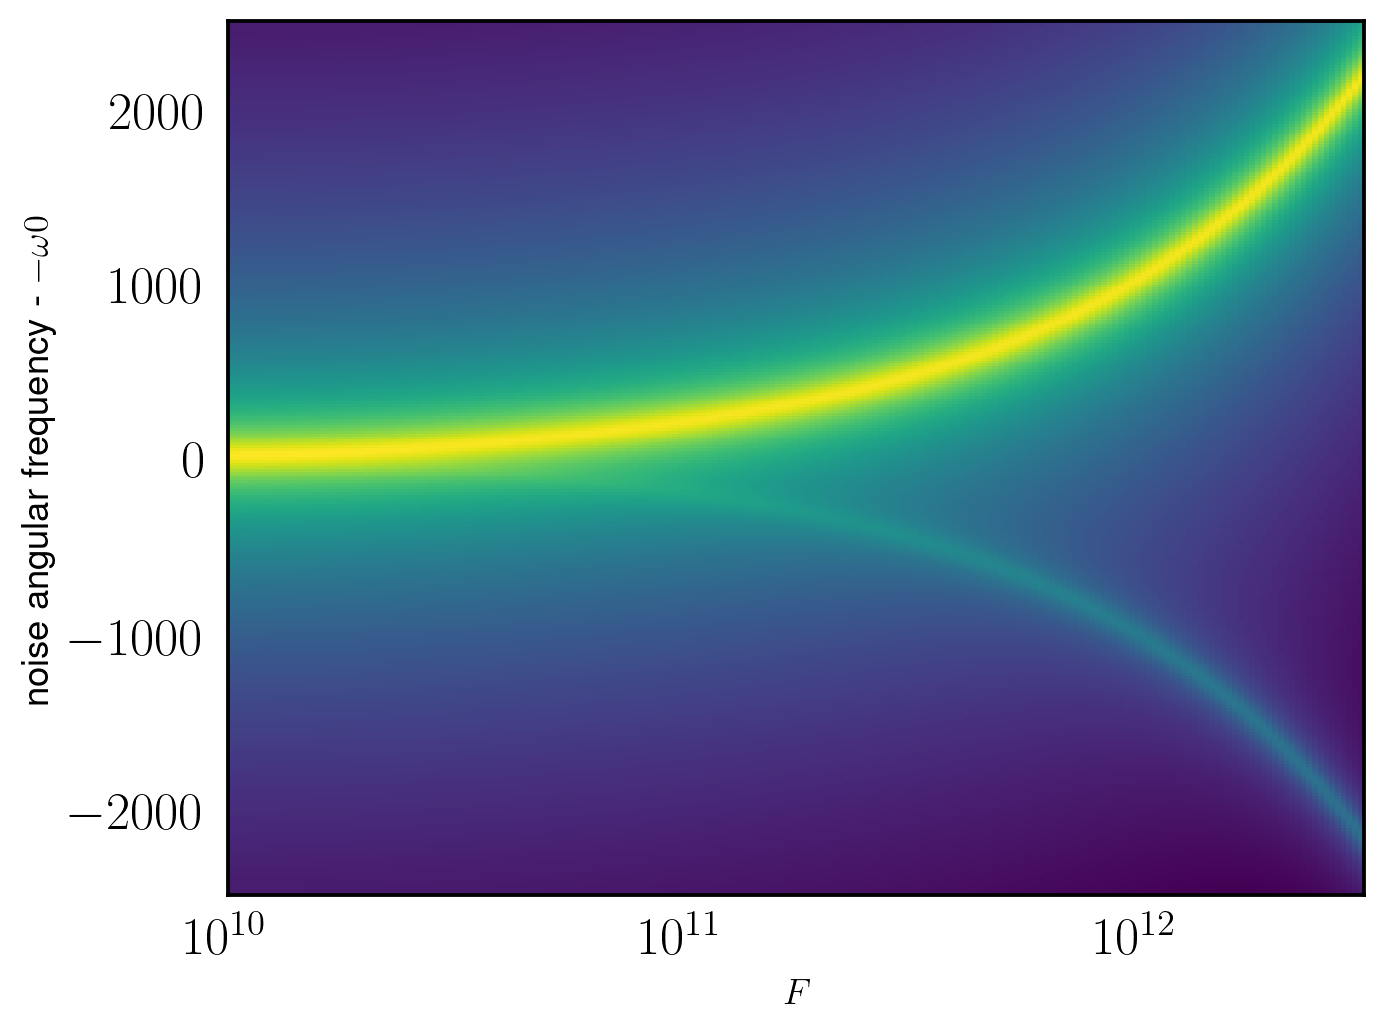

In [5]:
# centre the y-axis on ω0, use logscale colouring
HarmonicBalance.LinearResponse.plot_jacobian_spectrum(solutions, q, 
    Ω_range=2π * LinRange(-400,400,300), y_offset="-ω0", branch=1, logscale=true);

HarmonicBalance.xscale("log")